In [1]:
# imports all of the libraries we will be needing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# obtains the data from the csv file
data = pd.read_csv('survey_data.csv')

In [3]:
# looks at the first 5 entries of the data
data.head()

,CustomerID,Region,TownSize,Gender,Age,EducationYears,JobCategory,UnionMember,EmploymentLength,Retired,...,CallWait,CallForward,ThreeWayCalling,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
0,3964-QJWTRG-NPN,1,2,1,20,15,1,1,0,0,...,1,1,1,0,13,0,1,1,0,0
1,0648-AIPJSP-UVM,5,5,0,22,17,2,0,0,0,...,0,1,0,1,18,1,1,1,1,1
2,5195-TLUDJE-HVO,3,4,1,67,14,2,0,16,0,...,0,0,0,0,21,0,0,0,0,1
3,4459-VLPQUH-3OL,4,3,0,23,16,2,0,0,0,...,0,0,0,1,26,1,1,1,0,1
4,8158-SMTQFB-CNO,2,2,0,26,16,2,0,1,0,...,1,1,1,0,27,1,0,1,0,0


In [4]:
data.info()
# there are 5000 entries, no null values, 60 columns, and the following data types float64(11), int64(46), object(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 60 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           5000 non-null   object 
 1   Region               5000 non-null   int64  
 2   TownSize             5000 non-null   object 
 3   Gender               5000 non-null   int64  
 4   Age                  5000 non-null   int64  
 5   EducationYears       5000 non-null   int64  
 6   JobCategory          5000 non-null   int64  
 7   UnionMember          5000 non-null   int64  
 8   EmploymentLength     5000 non-null   int64  
 9   Retired              5000 non-null   int64  
 10  HouseholdIncome      5000 non-null   int64  
 11  DebtToIncomeRatio    5000 non-null   float64
 12  CreditDebt           5000 non-null   float64
 13  OtherDebt            5000 non-null   float64
 14  LoanDefault          5000 non-null   int64  
 15  MaritalStatus        5000 non-null   i

In [5]:
# creates a dataframe for the data we are selecting
# Quasi-identifiers: 'Gender', 'Age', 'EducationYears', 'HouseholdIncome', 'DebtToIncomeRatio', 'EmploymentLength'
df = pd.DataFrame(data[['Gender', 'Age', 'EducationYears', 'HouseholdIncome', 'DebtToIncomeRatio', 'EmploymentLength']])
df

,Gender,Age,EducationYears,HouseholdIncome,DebtToIncomeRatio,EmploymentLength
0,1,20,15,31,11.1,0
1,0,22,17,15,18.6,0
2,1,67,14,35,9.9,16
3,0,23,16,20,5.7,0
4,0,26,16,23,1.7,1
...,...,...,...,...,...,...
4995,0,68,10,196,8.0,24
4996,0,51,14,83,15.0,6
4997,0,75,17,108,10.8,24
4998,0,47,19,189,10.8,3


In [6]:
# describes our data
# we have 5000 unique customers
# the min value of Age is 18, the average age is 47, while the max value is 79
# the min value of Education years is 6, the average is 14, while the max value is 23
# the min value of Household income is 9, the average is 54, while the max value is 1073
# the min value of Debt to income ratio is 0, the average is 10, while the max value is 43
# the min value of Employment length is 0, the average age is 10, while the max value is 52
df.describe()

,Gender,Age,EducationYears,HouseholdIncome,DebtToIncomeRatio,EmploymentLength
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.503600,47.025600,14.543000,54.759600,9.954160,9.730400
std,0.500037,17.770338,3.281083,55.377511,6.399783,9.690929
min,0.000000,18.000000,6.000000,9.000000,0.000000,0.000000
25%,0.000000,31.000000,12.000000,24.000000,5.100000,2.000000
50%,1.000000,47.000000,14.000000,38.000000,8.800000,7.000000
75%,1.000000,62.000000,17.000000,67.000000,13.600000,15.000000
max,1.000000,79.000000,23.000000,1073.000000,43.100000,52.000000


In [7]:
# Eliminating some outliers

# the min value of Household income is 9, the average is 54, while the max value is 1073. 
# I decided to eliminate values above 1000 as they would be easily identified compared to the average of 47..That's a total of 1 value which is 1073
df = df[df['HouseholdIncome'] <= 1000]

# the min value of Debt to income ratio is 0, the average is 10, while the max value is 43
# I decided to eliminate values below 0.1 as they would be easily identified compared to the average of 10 and greater than 40 as they would be easily identifiable
# there were 3 people with debt to income ratio greater than 40 and one with less than 0.1
df = df.loc[(df['DebtToIncomeRatio'] >= 0.01) & (df['DebtToIncomeRatio'] < 40)]
# the min value of Employment length is 0, the average age is 10, while the max value is 52
# I decided to eliminate the values above 45 as they are very few and easily identifiable
df = df.loc[(df['EmploymentLength'] < 46)& (df['EmploymentLength'] > 0)]

clean_data = df


## Mask the data

In [8]:
# mask the data
# step 1: Age masking 
# the min value of Age is 18, the average age is 47, while the max value is 79
# group the ages into bins of range 3
bins = range(16, 82, 3)
labels = ['{}-{}'.format(i, i+2) for i in bins[:-1]]
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# make sure all of our values are grouped correctly
nan_count = df.isna().sum()
nan_count

Gender               0
Age                  0
EducationYears       0
HouseholdIncome      0
DebtToIncomeRatio    0
EmploymentLength     0
Age_group            0
dtype: int64

In [9]:
# lets take a look at our df after age has been dropped and age group has been created
# df = df.drop('Age', axis=1)
# df

In [10]:
# mask the data
# step 2: Education Years masking 
# group the education years into bins of range 3
# the min value of Education years is 6, the average is 14, while the max value is 23
bins = range(1, 26, 3)
labels = ['{}-{}'.format(i, i+2) for i in bins[:-1]]
df['EducationYears_group'] = pd.cut(df['EducationYears'], bins=bins, labels=labels)

# make sure all of our values are grouped correctly
nan_count = df.isna().sum()
nan_count

Gender                  0
Age                     0
EducationYears          0
HouseholdIncome         0
DebtToIncomeRatio       0
EmploymentLength        0
Age_group               0
EducationYears_group    0
dtype: int64

In [11]:
# mask the data
# step 3: Household income masking 
# group the household income into bins of range 3
# the min value of Household income is 9, the average is 54, while the max value is 1073
bins = range(1, 1000, 3)
labels = ['{}-{}'.format(i, i+2) for i in bins[:-1]]
df['HouseholdIncome_group'] = pd.cut(df['HouseholdIncome'], bins=bins, labels=labels)

# make sure all of our values are grouped correctly
nan_count = df.isna().sum()
nan_count

Gender                   0
Age                      0
EducationYears           0
HouseholdIncome          0
DebtToIncomeRatio        0
EmploymentLength         0
Age_group                0
EducationYears_group     0
HouseholdIncome_group    0
dtype: int64

In [12]:
# mask the data
# step 4: Debt to income ratio masking 
# group the Debt to income ratio into bins of range 3
# the min value of Debt to income ratio is 0, the average is 10, while the max value is 43.1
bins = range(0, 46, 3)
labels = ['{}-{}'.format(i, i+2) for i in bins[:-1]]
df['DebtToIncomeRatio_group'] = pd.cut(df['DebtToIncomeRatio'], bins=bins, labels=labels)


# make sure all of our values are grouped correctly
nan_count = df.isna().sum()
nan_count

Gender                     0
Age                        0
EducationYears             0
HouseholdIncome            0
DebtToIncomeRatio          0
EmploymentLength           0
Age_group                  0
EducationYears_group       0
HouseholdIncome_group      0
DebtToIncomeRatio_group    0
dtype: int64

In [13]:
# There was a value that was ungrouped above. '0.0'
# The range was chanted to start a -1 to include 0.0
# ungrouped = df['DebtToIncomeRatio_group'].isna()
# df[ungrouped]
#df[df['DebtToIncomeRatio'] == 0.0]


In [14]:
# mask the data
# step 5: Employment length masking 
# group the Employment Length into bins of range 3
# the min value of Employment length is 0, the average age is 10, while the max value is 52
bins = range(0, 56, 3)
labels = ['{}-{}'.format(i, i+2) for i in bins[:-1]]
df['EmploymentLength_group'] = pd.cut(df['EmploymentLength'], bins=bins, labels=labels)


# make sure all of our values are grouped correctly
nan_count = df.isna().sum()
nan_count

Gender                     0
Age                        0
EducationYears             0
HouseholdIncome            0
DebtToIncomeRatio          0
EmploymentLength           0
Age_group                  0
EducationYears_group       0
HouseholdIncome_group      0
DebtToIncomeRatio_group    0
EmploymentLength_group     0
dtype: int64

In [15]:
# mask the data
# step 6: Gender masking 
# Encode the gender into F or M

# Define a mapping of values to F or M
gender_map = {0: 'F', 1: 'M'}

# Apply the mapping to the column
df['Sex'] = df['Gender'].map(gender_map)


# make sure all of our values are grouped correctly
nan_count = df.isna().sum()
nan_count

Gender                     0
Age                        0
EducationYears             0
HouseholdIncome            0
DebtToIncomeRatio          0
EmploymentLength           0
Age_group                  0
EducationYears_group       0
HouseholdIncome_group      0
DebtToIncomeRatio_group    0
EmploymentLength_group     0
Sex                        0
dtype: int64

In [16]:
# lets find out more information of our new data
df.describe()

,Gender,Age,EducationYears,HouseholdIncome,DebtToIncomeRatio,EmploymentLength
count,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000
mean,0.500578,50.638023,14.389928,58.435897,9.953384,11.146916
std,0.500057,16.061097,3.332325,55.924689,6.331875,9.476386
min,0.000000,18.000000,6.000000,9.000000,0.100000,1.000000
25%,0.000000,37.000000,12.000000,26.000000,5.200000,4.000000
50%,1.000000,51.000000,14.000000,42.000000,8.800000,8.000000
75%,1.000000,64.000000,17.000000,72.000000,13.600000,16.000000
max,1.000000,79.000000,23.000000,995.000000,37.500000,45.000000


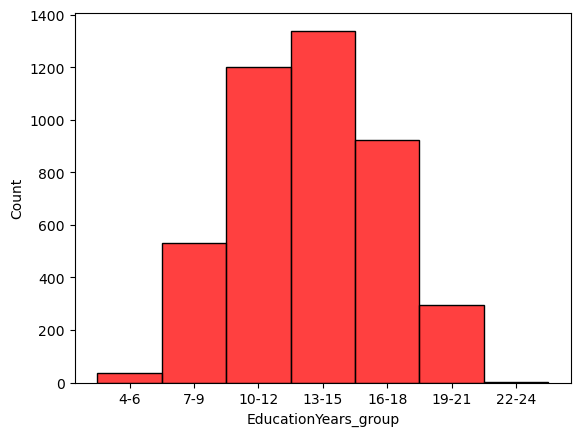

In [17]:
# histogram for our 'EducationYears_group'

sns.histplot(data=df, x='EducationYears_group', color='red', bins=20)
plt.show()

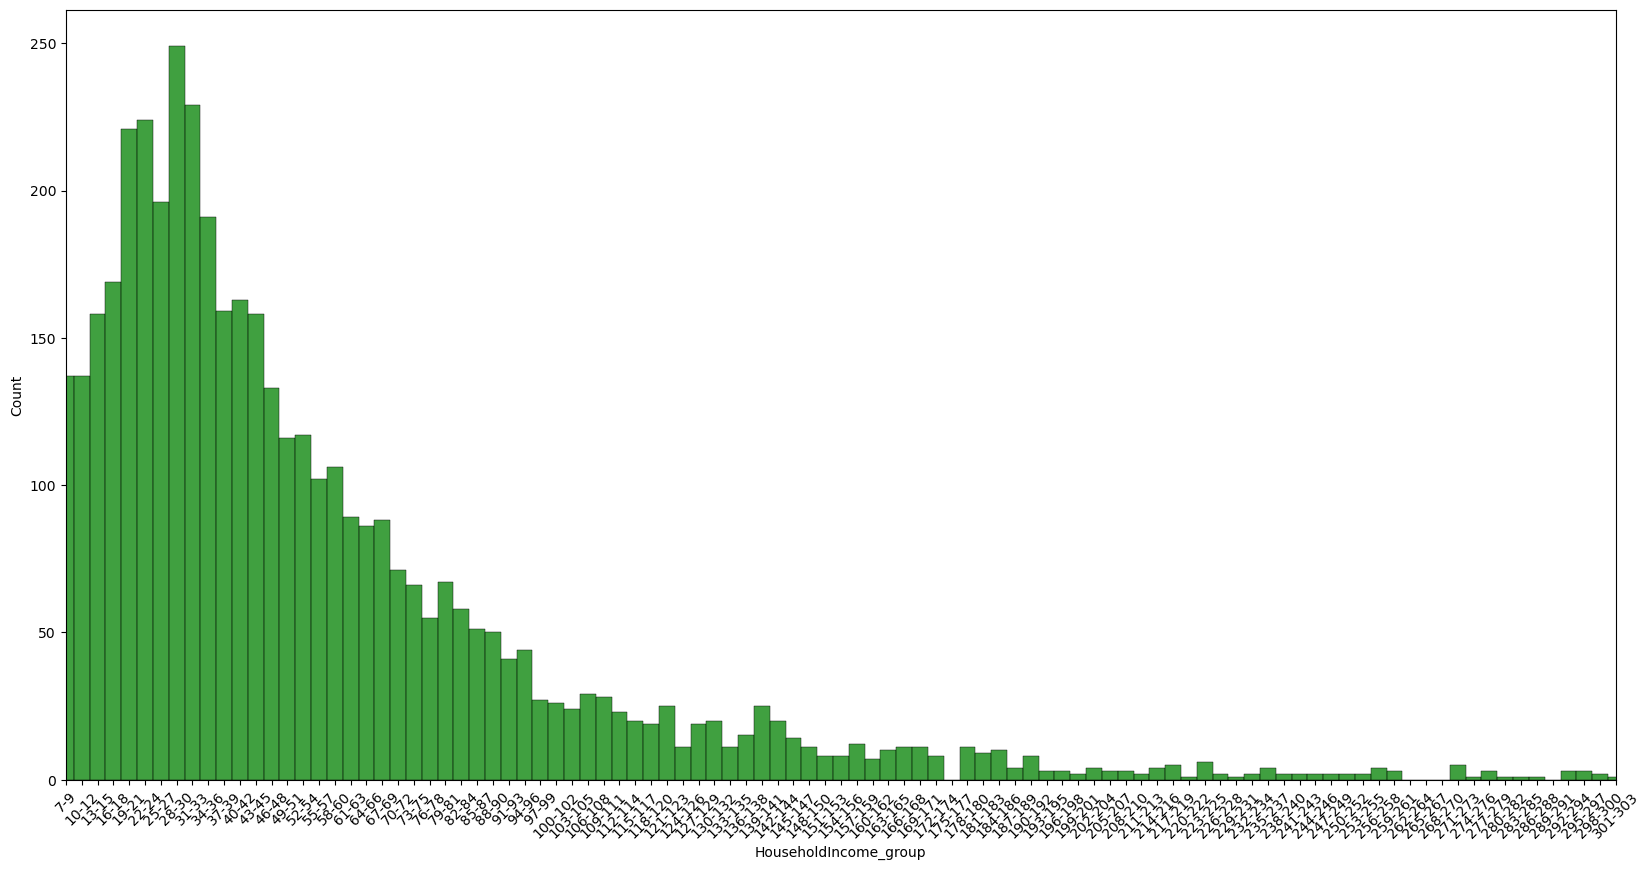

In [18]:
# histogram for our 'HouseholdIncome_group' 

plt.figure(figsize=(20,10))
sns.histplot(data=df, x='HouseholdIncome_group', color='green', bins=10)
plt.xlim(2, 100)
plt.xticks(rotation=45)
plt.show()

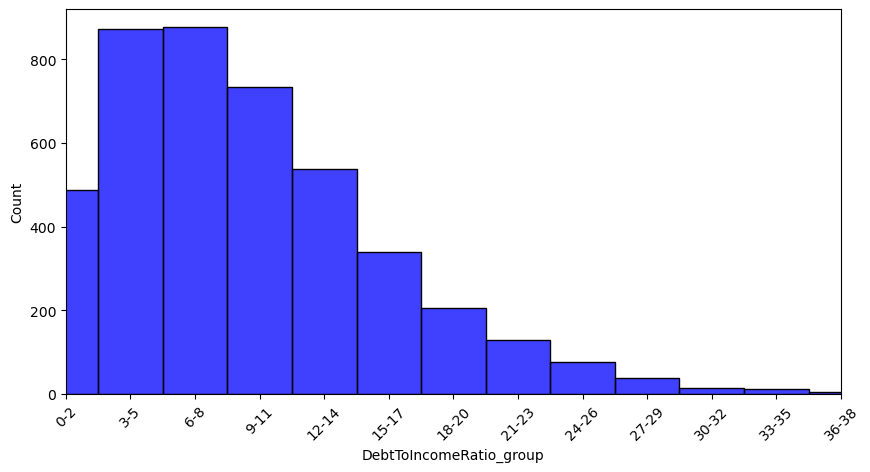

In [19]:
# histogram for our 'DebtToIncomeRatio_group' 

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='DebtToIncomeRatio_group', color='blue', bins=1)
plt.xlim(0, 12)
plt.xticks(rotation=45)
plt.show()

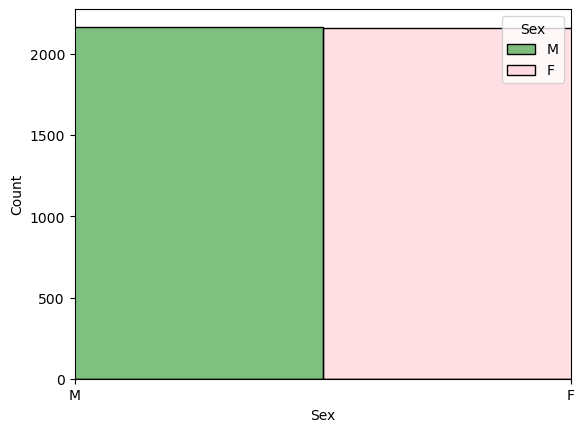

In [20]:
# histogram for our 'Sex' 
# we can see that our sex category is almost evenly distributed between males and females

sns.histplot(data=df, x='Sex', hue='Sex', bins=1, palette={'M':'green', 'F':'pink'})
plt.xlim(0, 1)
plt.show()

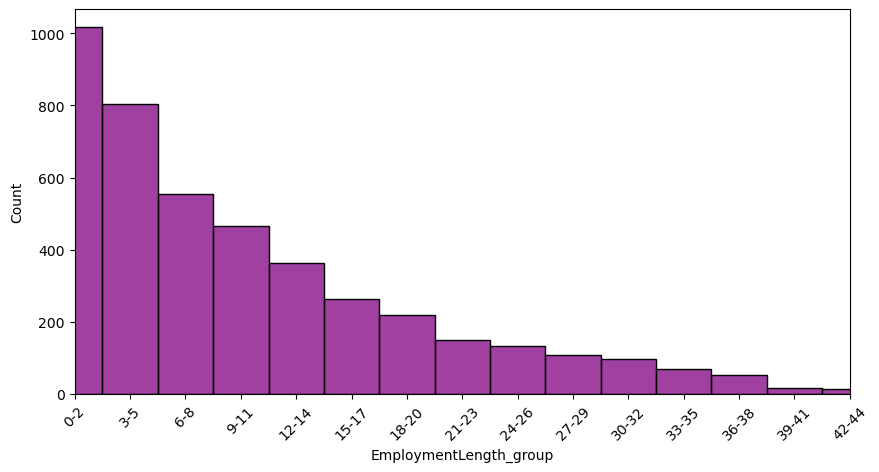

In [21]:
# histogram for our 'EmploymentLength_group' 
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='EmploymentLength_group', color='purple', bins=10)
plt.xlim(0, 14)
plt.xticks(rotation=45)
plt.show()

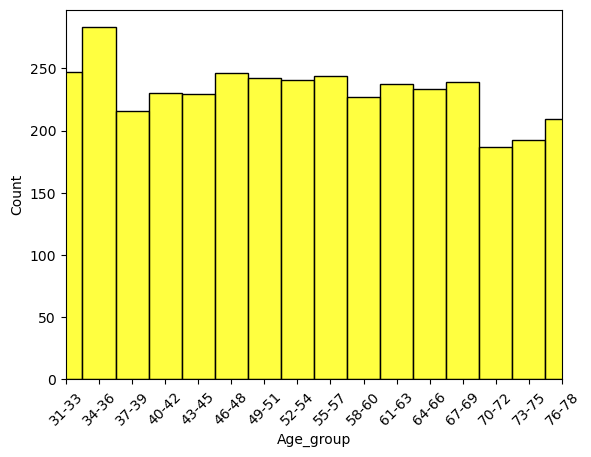

In [22]:
# histogram for our 'Age group'
sns.histplot(data=df, x='Age_group', color='yellow', bins=1)
plt.xlim(5, 20)
plt.xticks(rotation=45)
plt.show()

In [23]:
df.describe()

,Gender,Age,EducationYears,HouseholdIncome,DebtToIncomeRatio,EmploymentLength
count,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000
mean,0.500578,50.638023,14.389928,58.435897,9.953384,11.146916
std,0.500057,16.061097,3.332325,55.924689,6.331875,9.476386
min,0.000000,18.000000,6.000000,9.000000,0.100000,1.000000
25%,0.000000,37.000000,12.000000,26.000000,5.200000,4.000000
50%,1.000000,51.000000,14.000000,42.000000,8.800000,8.000000
75%,1.000000,64.000000,17.000000,72.000000,13.600000,16.000000
max,1.000000,79.000000,23.000000,995.000000,37.500000,45.000000


# DATASET WITH QUASI-IDENTIFIERS GROUPED

In [24]:

groupeQuasi_df = df[["Age_group", "EducationYears_group", "HouseholdIncome_group", "DebtToIncomeRatio_group", "EmploymentLength_group", "Sex"]]
groupeQuasi_df

,Age_group,EducationYears_group,HouseholdIncome_group,DebtToIncomeRatio_group,EmploymentLength_group,Sex
2,64-66,13-15,34-36,9-11,15-17,M
4,25-27,13-15,22-24,0-2,0-2,F
5,61-63,16-18,106-108,3-5,21-23,F
6,49-51,13-15,76-78,0-2,9-11,M
7,43-45,13-15,94-96,12-14,9-11,M
...,...,...,...,...,...,...
4995,67-69,7-9,193-195,6-8,21-23,F
4996,49-51,13-15,82-84,12-14,3-5,F
4997,73-75,16-18,106-108,9-11,21-23,F
4998,46-48,16-18,187-189,9-11,0-2,F


In [25]:
# *********************** EXAMPLE ONLY ******************** EXAMPLE ONLY 

# re-identification example of Risk of Age group 

# first group the data by age group and count the number of people in each age group. 
# Then, calculate the re-identification risk for each age group by dividing the size of each age group by the total size of all age groups combined.

age_groupcounts = df.groupby('Age_group')['Age'].agg([('EquivClassSize', 'count')]).reset_index()

# Calculate the re-identification risk for each age group
total_count = age_groupcounts['EquivClassSize'].sum()
age_groupcounts['re-identificationRisk'] = age_groupcounts['EquivClassSize'] / total_count

age_groupcounts


,Age_group,EquivClassSize,re-identificationRisk
0,16-18,10,0.002310
1,19-21,58,0.013398
2,22-24,136,0.031416
3,25-27,187,0.043197
4,28-30,236,0.054516
5,31-33,247,0.057057
6,34-36,283,0.065373
7,37-39,216,0.049896
8,40-42,230,0.053130
9,43-45,229,0.052899


In [26]:
# smallest equivalence class = 10
# formula 1/ total of equivalence class 
risk_id = 1/10
risk_id
# risk identification is 10% 

0.1

# TRIAL 1: EQUIVALENCE CLASSES


In [27]:
grouped = groupeQuasi_df.groupby(['Age_group', 'EducationYears_group', 'HouseholdIncome_group', 'DebtToIncomeRatio_group', 'EmploymentLength_group', 'Sex']).size().reset_index(name='EquivClass')
grouped[grouped['EquivClass'] > 1]

,Age_group,EducationYears_group,HouseholdIncome_group,DebtToIncomeRatio_group,EmploymentLength_group,Sex,EquivClass
1795537,19-21,7-9,16-18,3-5,0-2,M,2
1796076,19-21,7-9,19-21,3-5,0-2,F,2
1974276,19-21,10-12,13-15,3-5,0-2,F,3
1974348,19-21,10-12,13-15,9-11,0-2,F,4
1974852,19-21,10-12,16-18,6-8,0-2,F,2
...,...,...,...,...,...,...,...
29044626,76-78,7-9,7-9,15-17,9-11,F,2
29044998,76-78,7-9,10-12,0-2,27-29,F,2
29223835,76-78,10-12,7-9,9-11,9-11,M,2
29224894,76-78,10-12,13-15,6-8,33-35,F,2


# Trial 1: Risk identification


In [28]:
# number of equivalence classes we have
grouped[grouped['EquivClass'] > 1].count()


Age_group                  105
EducationYears_group       105
HouseholdIncome_group      105
DebtToIncomeRatio_group    105
EmploymentLength_group     105
Sex                        105
EquivClass                 105
dtype: int64

In [29]:
# finds the min value amongst the equivalence classes
grouped[grouped['EquivClass'] > 1].min()

# it seems as 2 is minimum value amongst the equivalence classes

Age_group                  19-21
EducationYears_group         7-9
HouseholdIncome_group        7-9
DebtToIncomeRatio_group      0-2
EmploymentLength_group       0-2
Sex                            F
EquivClass                     2
dtype: object

In [30]:
# smallest equivalence class = 2
# formula 1/ total of equivalence class 
risk_id = 1/2
risk_id
# risk identification is 50% 

0.5

In [31]:
# 4 risk scenarios: Scenario 1: Deliberate Data Attack

numberof_employees = 300.0
rogue_employees = 60.0
#formula = rogue_employees/numberofemployees
risk_identification = (rogue_employees/numberof_employees) * 100
risk_identification
# risk identification is 20% 
 

20.0

In [32]:
# 4 risk scenarios: Scenario 2: Inadvertent Data Attack
# resource https://www.fundera.com/resources/small-business-lending-statistics#:~:text=Alternative%20lenders%20have%20a%2056.8,have%20a%2027.7%25%20approval%20rate.

bank_approval_rate = 27.70/100
average_friends = 150.00
# formula = 1-(1-0.02770)^150
#probabilityof_acquaintance = 1.00 - (1.00 - bank_approval_rate)^average_friends
# probabilityof_acquaintance is 99%

In [33]:
# 4 risk scenarios: Scenario 3: Data Breach

# average percent of people who get their credentials stolen = 19% 
# probability of breach is 19% 
# resource https://www.ibm.com/reports/data-breach?utm_content=SRCWW&p1=Search&p4=43700072379268724&p5=p&gclid=CjwKCAiAjPyfBhBMEiwAB2CCIsX8n31iNCT5XQbRg6IFte3ohXSURwF86uA5mFSlkIGRweg5WIisrRoCdSYQAvD_BwE&gclsrc=aw.ds 
probability_of_breach = 19.0

In [34]:
# 4 risk scenarios: Scenario 4: Demonstration attack
# 6 out of 6 quasi identifiers
risk = 100.0
# 100% risk of getting identified

## Trial # 2

In [37]:
# Lets make a dataframe from our copy of our clean original df
df2 = pd.DataFrame(clean_data)
df2

,Gender,Age,EducationYears,HouseholdIncome,DebtToIncomeRatio,EmploymentLength,Age_group,EducationYears_group,HouseholdIncome_group,DebtToIncomeRatio_group,EmploymentLength_group,Sex,Age_group2,EducationYears_group2,HouseholdIncome_group2,DebtToIncomeRatio_group2,EmploymentLength_group2,Sex2
2,1,67,14,35,9.9,16,64-66,13-15,34-36,9-11,15-17,M,65-70,11-16,31-36,6-11,12-17,M
4,0,26,16,23,1.7,1,25-27,13-15,22-24,0-2,0-2,F,23-28,11-16,19-24,0-5,0-5,F
5,0,64,17,107,5.6,22,61-63,16-18,106-108,3-5,21-23,F,59-64,11-16,103-108,0-5,18-23,F
6,1,52,14,77,1.9,10,49-51,13-15,76-78,0-2,9-11,M,47-52,11-16,73-78,0-5,6-11,M
7,1,44,16,97,14.4,11,43-45,13-15,94-96,12-14,9-11,M,41-46,11-16,91-96,12-17,6-11,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,68,10,196,8.0,24,67-69,7-9,193-195,6-8,21-23,F,65-70,5-10,193-198,6-11,18-23,F
4996,0,51,14,83,15.0,6,49-51,13-15,82-84,12-14,3-5,F,47-52,11-16,79-84,12-17,0-5,F
4997,0,75,17,108,10.8,24,73-75,16-18,106-108,9-11,21-23,F,71-76,11-16,103-108,6-11,18-23,F
4998,0,47,19,189,10.8,3,46-48,16-18,187-189,9-11,0-2,F,41-46,17-22,187-192,6-11,0-5,F


## Mask the data

In [38]:
# Data Masking

# new range: 6

# step 1: Age masking 
# the min value of Age is 18, the average age is 47, while the max value is 79
# group the ages into bins of range 6
bins = range(17, 84, 6)
labels = ['{}-{}'.format(i, i+5) for i in bins[:-1]]
df2['Age_group2'] = pd.cut(df2['Age'], bins=bins, labels=labels)

# step 2: Education Years masking 
# group the education years into bins of range 6
# the min value of Education years is 6, the average is 14, while the max value is 23
bins = range(5, 25, 6)
labels = ['{}-{}'.format(i, i+5) for i in bins[:-1]]
df2['EducationYears_group2'] = pd.cut(df2['EducationYears'], bins=bins, labels=labels)


# step 3: Household income masking 
# group the household income into bins of range 6
# the min value of Household income is 9, the average is 54, while the max value is 1073
bins = range(1, 1000, 6)
labels = ['{}-{}'.format(i, i+5) for i in bins[:-1]]
df2['HouseholdIncome_group2'] = pd.cut(df2['HouseholdIncome'], bins=bins, labels=labels)

# step 4: Debt to income ratio masking 
# group the Debt to income ratio into bins of range 6
# the min value of Debt to income ratio is 0, the average is 10, while the max value is 43.1
bins = range(0, 46, 6)
labels = ['{}-{}'.format(i, i+5) for i in bins[:-1]]
df2['DebtToIncomeRatio_group2'] = pd.cut(df2['DebtToIncomeRatio'], bins=bins, labels=labels)

# step 5: Employment length masking 
# group the Employment Length into bins of range 6
# the min value of Employment length is 0, the average age is 10, while the max value is 52
bins = range(0, 56, 6)
labels = ['{}-{}'.format(i, i+5) for i in bins[:-1]]
df2['EmploymentLength_group2'] = pd.cut(df2['EmploymentLength'], bins=bins, labels=labels)


# step 6: Gender masking 
# Encode the gender into F or M

# Define a mapping of values to F or M
gender_map = {0: 'F', 1: 'M'}

# Apply the mapping to the column
df2['Sex2'] = df2['Gender'].map(gender_map)

# lets take a look at our df after dropping DebtToIncomeRatio, EmploymentLength and creating DebtToIncomeRatio_group, and EmploymentLength_group
df2 = df2.drop(['Age','EducationYears', 'HouseholdIncome','EmploymentLength','DebtToIncomeRatio', 'Gender'], axis=1)

# make sure all of our values are grouped correctly
nan_count = df2.isna().sum()
nan_count

Age_group                   0
EducationYears_group        0
HouseholdIncome_group       0
DebtToIncomeRatio_group     0
EmploymentLength_group      0
Sex                         0
Age_group2                  0
EducationYears_group2       0
HouseholdIncome_group2      0
DebtToIncomeRatio_group2    0
EmploymentLength_group2     0
Sex2                        0
dtype: int64

##  DATASET WITH QUASI-IDENTIFIERS GROUPED

In [39]:
groupeQuasi_df2 = df2[["Age_group2", "EducationYears_group2", "HouseholdIncome_group2", "DebtToIncomeRatio_group2", "EmploymentLength_group2", "Sex2"]]
groupeQuasi_df2

,Age_group2,EducationYears_group2,HouseholdIncome_group2,DebtToIncomeRatio_group2,EmploymentLength_group2,Sex2
2,65-70,11-16,31-36,6-11,12-17,M
4,23-28,11-16,19-24,0-5,0-5,F
5,59-64,11-16,103-108,0-5,18-23,F
6,47-52,11-16,73-78,0-5,6-11,M
7,41-46,11-16,91-96,12-17,6-11,M
...,...,...,...,...,...,...
4995,65-70,5-10,193-198,6-11,18-23,F
4996,47-52,11-16,79-84,12-17,0-5,F
4997,71-76,11-16,103-108,6-11,18-23,F
4998,41-46,17-22,187-192,6-11,0-5,F


# TRIAL 2 : EQUIVALENCE CLASSES


In [40]:
grouped2 = groupeQuasi_df2.groupby(['Age_group2', 'EducationYears_group2', 'HouseholdIncome_group2', 'DebtToIncomeRatio_group2', 'EmploymentLength_group2', 'Sex2']).size().reset_index(name='EquivClass2')
grouped2[grouped2['EquivClass2'] > 1]

,Age_group2,EducationYears_group2,HouseholdIncome_group2,DebtToIncomeRatio_group2,EmploymentLength_group2,Sex2,EquivClass2
252,17-22,5-10,13-18,0-5,0-5,F,6
253,17-22,5-10,13-18,0-5,0-5,M,6
270,17-22,5-10,13-18,6-11,0-5,F,11
288,17-22,5-10,13-18,12-17,0-5,F,2
378,17-22,5-10,19-24,0-5,0-5,F,3
...,...,...,...,...,...,...,...
648558,77-82,11-16,7-12,12-17,0-5,F,2
648650,77-82,11-16,13-18,0-5,6-11,F,2
648669,77-82,11-16,13-18,6-11,6-11,M,2
648676,77-82,11-16,13-18,6-11,30-35,F,2


# Trial 2: Risk identification


In [41]:
# number of equivalence classes we have
grouped2[grouped2['EquivClass2'] > 1].count()

Age_group2                  676
EducationYears_group2       676
HouseholdIncome_group2      676
DebtToIncomeRatio_group2    676
EmploymentLength_group2     676
Sex2                        676
EquivClass2                 676
dtype: int64

In [42]:
# finds the min value amongst the equivalence classes
grouped2[grouped2['EquivClass2'] > 1].min()

# it seems as 2 is minimum value amongst the equivalence classes

Age_group2                  17-22
EducationYears_group2        5-10
HouseholdIncome_group2       7-12
DebtToIncomeRatio_group2      0-5
EmploymentLength_group2       0-5
Sex2                            F
EquivClass2                     2
dtype: object

In [43]:
# smallest equivalence class = 2
# formula 1/ total of equivalence class 
risk_id = 1/2
risk_id
# risk identification is 50% 

0.5

In [44]:
# our max value in an equivalence class is 14 so we can go higher than our group range of 6
grouped2[grouped2['EquivClass2'] > 1].max()

Age_group2                    77-82
EducationYears_group2         17-22
HouseholdIncome_group2      139-144
DebtToIncomeRatio_group2      30-35
EmploymentLength_group2       30-35
Sex2                              M
EquivClass2                      14
dtype: object

# Trial #3

In [45]:
# new equivalence classes based on a copy of our df
df3 = pd.DataFrame(clean_data)
df3

,Gender,Age,EducationYears,HouseholdIncome,DebtToIncomeRatio,EmploymentLength,Age_group,EducationYears_group,HouseholdIncome_group,DebtToIncomeRatio_group,EmploymentLength_group,Sex,Age_group2,EducationYears_group2,HouseholdIncome_group2,DebtToIncomeRatio_group2,EmploymentLength_group2,Sex2
2,1,67,14,35,9.9,16,64-66,13-15,34-36,9-11,15-17,M,65-70,11-16,31-36,6-11,12-17,M
4,0,26,16,23,1.7,1,25-27,13-15,22-24,0-2,0-2,F,23-28,11-16,19-24,0-5,0-5,F
5,0,64,17,107,5.6,22,61-63,16-18,106-108,3-5,21-23,F,59-64,11-16,103-108,0-5,18-23,F
6,1,52,14,77,1.9,10,49-51,13-15,76-78,0-2,9-11,M,47-52,11-16,73-78,0-5,6-11,M
7,1,44,16,97,14.4,11,43-45,13-15,94-96,12-14,9-11,M,41-46,11-16,91-96,12-17,6-11,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,68,10,196,8.0,24,67-69,7-9,193-195,6-8,21-23,F,65-70,5-10,193-198,6-11,18-23,F
4996,0,51,14,83,15.0,6,49-51,13-15,82-84,12-14,3-5,F,47-52,11-16,79-84,12-17,0-5,F
4997,0,75,17,108,10.8,24,73-75,16-18,106-108,9-11,21-23,F,71-76,11-16,103-108,6-11,18-23,F
4998,0,47,19,189,10.8,3,46-48,16-18,187-189,9-11,0-2,F,41-46,17-22,187-192,6-11,0-5,F


In [47]:
# Data Masking

# step 1: Age masking 
# the min value of Age is 18, the average age is 47, while the max value is 79
# group the ages into bins of range 15
bins = range(17, 105, 15)
labels = ['{}-{}'.format(i, i+14) for i in bins[:-1]]
df3['Age_group3'] = pd.cut(df3['Age'], bins=bins, labels=labels)

# step 2: Education Years masking 
# group the education years into bins of range 15
# the min value of Education years is 6, the average is 14, while the max value is 23
bins = range(5, 51, 15)
labels = ['{}-{}'.format(i, i+14) for i in bins[:-1]]
df3['EducationYears_group3'] = pd.cut(df3['EducationYears'], bins=bins, labels=labels)


# step 3: Household income masking 
# group the household income into bins of range 15
# the min value of Household income is 9, the average is 54, while the max value is 100
bins = range(1, 1100, 15)
labels = ['{}-{}'.format(i, i+14) for i in bins[:-1]]
df3['HouseholdIncome_group3'] = pd.cut(df3['HouseholdIncome'], bins=bins, labels=labels)

# step 4: Debt to income ratio masking 
# group the Debt to income ratio into bins of range 15
# the min value of Debt to income ratio is 0, the average is 10, while the max value is 43.1
bins = range(0, 60, 15)
labels = ['{}-{}'.format(i, i+14) for i in bins[:-1]]
df3['DebtToIncomeRatio_group3'] = pd.cut(df3['DebtToIncomeRatio'], bins=bins, labels=labels)

# step 5: Employment length masking 
# group the Employment Length into bins of range 15
# the min value of Employment length is 0, the average age is 10, while the max value is 52
bins = range(0, 60, 15)
labels = ['{}-{}'.format(i, i+14) for i in bins[:-1]]
df3['EmploymentLength_group3'] = pd.cut(df3['EmploymentLength'], bins=bins, labels=labels)


# step 6: Gender masking 
# Encode the gender into F or M

# Define a mapping of values to F or M
gender_map = {0: 'F', 1: 'M'}

# Apply the mapping to the column
df3['Sex3'] = df3['Gender'].map(gender_map)

# lets take a look at our df after dropping DebtToIncomeRatio, EmploymentLength and creating DebtToIncomeRatio_group, and EmploymentLength_group
df3 = df3.drop(['Age_group2', 'EducationYears_group2','HouseholdIncome_group2', 'DebtToIncomeRatio_group2', 'Age_group', 'EmploymentLength_group2', 'Sex2' ,'Age','EducationYears', 'HouseholdIncome','EmploymentLength','DebtToIncomeRatio', 'Gender'], axis=1)

# make sure all of our values are grouped correctly
nan_count = df3.isna().sum()
nan_count

EducationYears_group        0
HouseholdIncome_group       0
DebtToIncomeRatio_group     0
EmploymentLength_group      0
Sex                         0
Age_group3                  0
EducationYears_group3       0
HouseholdIncome_group3      0
DebtToIncomeRatio_group3    0
EmploymentLength_group3     0
Sex3                        0
dtype: int64

##  DATASET WITH QUASI-IDENTIFIERS GROUPED

In [48]:
groupeQuasi_df3 = df3[["Age_group3", "EducationYears_group3", "HouseholdIncome_group3", "DebtToIncomeRatio_group3", "EmploymentLength_group3", "Sex3"]]
groupeQuasi_df3

,Age_group3,EducationYears_group3,HouseholdIncome_group3,DebtToIncomeRatio_group3,EmploymentLength_group3,Sex3
2,62-76,5-19,31-45,0-14,15-29,M
4,17-31,5-19,16-30,0-14,0-14,F
5,62-76,5-19,106-120,0-14,15-29,F
6,47-61,5-19,76-90,0-14,0-14,M
7,32-46,5-19,91-105,0-14,0-14,M
...,...,...,...,...,...,...
4995,62-76,5-19,181-195,0-14,15-29,F
4996,47-61,5-19,76-90,0-14,0-14,F
4997,62-76,5-19,106-120,0-14,15-29,F
4998,32-46,5-19,181-195,0-14,0-14,F


# TRIAL 3 : EQUIVALENCE CLASSES


In [49]:
grouped3 = groupeQuasi_df3.groupby(['Age_group3', 'EducationYears_group3', 'HouseholdIncome_group3', 'DebtToIncomeRatio_group3', 'EmploymentLength_group3', 'Sex3']).size().reset_index(name='EquivClass3')
grouped3[grouped3['EquivClass3'] > 1]

,Age_group3,EducationYears_group3,HouseholdIncome_group3,DebtToIncomeRatio_group3,EmploymentLength_group3,Sex3,EquivClass3
0,17-31,5-19,1-15,0-14,0-14,F,32
1,17-31,5-19,1-15,0-14,0-14,M,21
6,17-31,5-19,1-15,15-29,0-14,F,2
7,17-31,5-19,1-15,15-29,0-14,M,2
18,17-31,5-19,16-30,0-14,0-14,F,160
...,...,...,...,...,...,...,...
15796,77-91,5-19,16-30,15-29,30-44,F,2
15805,77-91,5-19,31-45,0-14,0-14,M,2
15809,77-91,5-19,31-45,0-14,30-44,M,3
15824,77-91,5-19,46-60,0-14,15-29,F,2


In [50]:
# number of equivalence classes we have
grouped3[grouped3['EquivClass3'] > 1].count()

Age_group3                  322
EducationYears_group3       322
HouseholdIncome_group3      322
DebtToIncomeRatio_group3    322
EmploymentLength_group3     322
Sex3                        322
EquivClass3                 322
dtype: int64

In [51]:
# finds the min value amongst the equivalence classes
grouped3[grouped3['EquivClass3'] > 1].min()

# it seems as 2 is minimum value amongst the equivalence classes

Age_group3                  17-31
EducationYears_group3        5-19
HouseholdIncome_group3       1-15
DebtToIncomeRatio_group3     0-14
EmploymentLength_group3      0-14
Sex3                            F
EquivClass3                     2
dtype: object

In [52]:
# smallest equivalence class = 2
# formula 1/ total of equivalence class 
risk_id = 1/2
risk_id
# risk identification is 50% 

0.5

In [53]:
# our max value in an equivalence class is 163, I'll go higher by 5 points in our range. 
# However, this is now the point where our data is being questioned for utility
grouped3[grouped3['EquivClass3'] > 1].max()

Age_group3                    77-91
EducationYears_group3         20-34
HouseholdIncome_group3      406-420
DebtToIncomeRatio_group3      30-44
EmploymentLength_group3       30-44
Sex3                              M
EquivClass3                     163
dtype: object

## Trial # 4

In [54]:
# Lets make a dataframe from our copy of our clean original df
df4 = pd.DataFrame(clean_data)
df4

,Gender,Age,EducationYears,HouseholdIncome,DebtToIncomeRatio,EmploymentLength,Age_group,EducationYears_group,HouseholdIncome_group,DebtToIncomeRatio_group,...,HouseholdIncome_group2,DebtToIncomeRatio_group2,EmploymentLength_group2,Sex2,Age_group3,EducationYears_group3,HouseholdIncome_group3,DebtToIncomeRatio_group3,EmploymentLength_group3,Sex3
2,1,67,14,35,9.9,16,64-66,13-15,34-36,9-11,...,31-36,6-11,12-17,M,62-76,5-19,31-45,0-14,15-29,M
4,0,26,16,23,1.7,1,25-27,13-15,22-24,0-2,...,19-24,0-5,0-5,F,17-31,5-19,16-30,0-14,0-14,F
5,0,64,17,107,5.6,22,61-63,16-18,106-108,3-5,...,103-108,0-5,18-23,F,62-76,5-19,106-120,0-14,15-29,F
6,1,52,14,77,1.9,10,49-51,13-15,76-78,0-2,...,73-78,0-5,6-11,M,47-61,5-19,76-90,0-14,0-14,M
7,1,44,16,97,14.4,11,43-45,13-15,94-96,12-14,...,91-96,12-17,6-11,M,32-46,5-19,91-105,0-14,0-14,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,68,10,196,8.0,24,67-69,7-9,193-195,6-8,...,193-198,6-11,18-23,F,62-76,5-19,181-195,0-14,15-29,F
4996,0,51,14,83,15.0,6,49-51,13-15,82-84,12-14,...,79-84,12-17,0-5,F,47-61,5-19,76-90,0-14,0-14,F
4997,0,75,17,108,10.8,24,73-75,16-18,106-108,9-11,...,103-108,6-11,18-23,F,62-76,5-19,106-120,0-14,15-29,F
4998,0,47,19,189,10.8,3,46-48,16-18,187-189,9-11,...,187-192,6-11,0-5,F,32-46,5-19,181-195,0-14,0-14,F


## Mask the data

In [56]:
# Data Masking

# new range: 20

# step 1: Age masking 
# the min value of Age is 18, the average age is 47, while the max value is 79
# group the ages into bins of range 20
bins = range(17, 117, 20)
labels = ['{}-{}'.format(i, i+19) for i in bins[:-1]]
df4['Age_group4'] = pd.cut(df4['Age'], bins=bins, labels=labels)

# step 2: Education Years masking 
# group the education years into bins of range 20
# the min value of Education years is 6, the average is 14, while the max value is 23
bins = range(0, 80, 20)
labels = ['{}-{}'.format(i, i+19) for i in bins[:-1]]
df4['EducationYears_group4'] = pd.cut(df4['EducationYears'], bins=bins, labels=labels)


# step 3: Household income masking 
# group the household income into bins of range 20
# the min value of Household income is 9, the average is 54, while the max value is 100
bins = range(1, 1200, 20)
labels = ['{}-{}'.format(i, i+19) for i in bins[:-1]]
df4['HouseholdIncome_group4'] = pd.cut(df4['HouseholdIncome'], bins=bins, labels=labels)

# step 4: Debt to income ratio masking 
# group the Debt to income ratio into bins of range 20
# the min value of Debt to income ratio is 0, the average is 10, while the max value is 43.1
bins = range(0, 60, 20)
labels = ['{}-{}'.format(i, i+19) for i in bins[:-1]]
df4['DebtToIncomeRatio_group4'] = pd.cut(df4['DebtToIncomeRatio'], bins=bins, labels=labels)

# step 5: Employment length masking 
# group the Employment Length into bins of range 20
# the min value of Employment length is 0, the average age is 10, while the max value is 52
bins = range(0, 80, 20)
labels = ['{}-{}'.format(i, i+19) for i in bins[:-1]]
df4['EmploymentLength_group4'] = pd.cut(df4['EmploymentLength'], bins=bins, labels=labels)


# step 6: Gender masking 
# Encode the gender into F or M

# Define a mapping of values to F or M
gender_map = {0: 'F', 1: 'M'}

# Apply the mapping to the column
df4['Sex4'] = df4['Gender'].map(gender_map)

# lets take a look at our df after dropping DebtToIncomeRatio, EmploymentLength and creating DebtToIncomeRatio_group, and EmploymentLength_group
df4 = df4.drop(['Age','EducationYears', 'HouseholdIncome','EmploymentLength','DebtToIncomeRatio', 'Gender'], axis=1)

# make sure all of our values are grouped correctly
nan_count = df4.isna().sum()
nan_count

Age_group                   0
EducationYears_group        0
HouseholdIncome_group       0
DebtToIncomeRatio_group     0
EmploymentLength_group      0
Sex                         0
Age_group2                  0
EducationYears_group2       0
HouseholdIncome_group2      0
DebtToIncomeRatio_group2    0
EmploymentLength_group2     0
Sex2                        0
Age_group3                  0
EducationYears_group3       0
HouseholdIncome_group3      0
DebtToIncomeRatio_group3    0
EmploymentLength_group3     0
Sex3                        0
Age_group4                  0
EducationYears_group4       0
HouseholdIncome_group4      0
DebtToIncomeRatio_group4    0
EmploymentLength_group4     0
Sex4                        0
dtype: int64

##  DATASET WITH QUASI-IDENTIFIERS GROUPED

In [57]:
groupeQuasi_df4 = df4[["Age_group4", "EducationYears_group4", "HouseholdIncome_group4", "DebtToIncomeRatio_group4", "EmploymentLength_group4", "Sex4"]]
groupeQuasi_df4

,Age_group4,EducationYears_group4,HouseholdIncome_group4,DebtToIncomeRatio_group4,EmploymentLength_group4,Sex4
2,57-76,0-19,21-40,0-19,0-19,M
4,17-36,0-19,21-40,0-19,0-19,F
5,57-76,0-19,101-120,0-19,20-39,F
6,37-56,0-19,61-80,0-19,0-19,M
7,37-56,0-19,81-100,0-19,0-19,M
...,...,...,...,...,...,...
4995,57-76,0-19,181-200,0-19,20-39,F
4996,37-56,0-19,81-100,0-19,0-19,F
4997,57-76,0-19,101-120,0-19,20-39,F
4998,37-56,0-19,181-200,0-19,0-19,F


# TRIAL 4 : EQUIVALENCE CLASSES


In [58]:
grouped4 = groupeQuasi_df4.groupby(['Age_group4', 'EducationYears_group4', 'HouseholdIncome_group4', 'DebtToIncomeRatio_group4', 'EmploymentLength_group4', 'Sex4']).size().reset_index(name='EquivClass4')
grouped4[grouped4['EquivClass4'] > 1]

,Age_group4,EducationYears_group4,HouseholdIncome_group4,DebtToIncomeRatio_group4,EmploymentLength_group4,Sex4,EquivClass4
0,17-36,0-19,1-20,0-19,0-19,F,111
1,17-36,0-19,1-20,0-19,0-19,M,92
6,17-36,0-19,1-20,20-39,0-19,F,8
7,17-36,0-19,1-20,20-39,0-19,M,7
12,17-36,0-19,21-40,0-19,0-19,F,251
...,...,...,...,...,...,...,...
6386,77-96,0-19,21-40,0-19,20-39,F,6
6387,77-96,0-19,21-40,0-19,20-39,M,9
6396,77-96,0-19,41-60,0-19,0-19,F,2
6399,77-96,0-19,41-60,0-19,20-39,M,3


## Trial 4: Risk identification


In [59]:
# number of equivalence classes we have
grouped4[grouped4['EquivClass4'] > 1].count()

Age_group4                  193
EducationYears_group4       193
HouseholdIncome_group4      193
DebtToIncomeRatio_group4    193
EmploymentLength_group4     193
Sex4                        193
EquivClass4                 193
dtype: int64

In [60]:
# finds the min value amongst the equivalence classes
grouped4[grouped4['EquivClass4'] > 1].min()

# it seems as 2 is minimum value amongst the equivalence classes

Age_group4                  17-36
EducationYears_group4        0-19
HouseholdIncome_group4       1-20
DebtToIncomeRatio_group4     0-19
EmploymentLength_group4      0-19
Sex4                            F
EquivClass4                     2
dtype: object

In [61]:
# smallest equivalence class = 2
# formula 1/ total of equivalence class 
risk_id = 1/2
risk_id
# risk identification is 50% 

0.5

In [62]:
# our max value in an equivalence class is 286, this is already a pretty big value so I do not believe we should increase it any higher.
grouped4[grouped4['EquivClass4'] > 1].max()

Age_group4                    77-96
EducationYears_group4         20-39
HouseholdIncome_group4      401-420
DebtToIncomeRatio_group4      20-39
EmploymentLength_group4       40-59
Sex4                              M
EquivClass4                     286
dtype: object

In [67]:
# finds the next min value amongst the equivalence classes
grouped4[grouped4['EquivClass4'] > 2].min()

# it seems as 3 is minimum value amongst the equivalence classes

Age_group4                  17-36
EducationYears_group4        0-19
HouseholdIncome_group4       1-20
DebtToIncomeRatio_group4     0-19
EmploymentLength_group4      0-19
Sex4                            F
EquivClass4                     3
dtype: object

In [ ]:
# second smallest equivalence class = 3
# formula 1/ total of equivalence class 
risk_id = 1/3
risk_id
# risk identification is 33% 
# we'll use this to find different levels of risk